# Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

There are some values which are not captured properly while collecting the data 
are the missing values in data ,it is important to handle the missing values 
because some algorithm do not work on missing values 

KNN and Random forest algo do not need hndling of missing values

# Q2: List down techniques used to handle missing data. Give an example of each with python code.

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#delete rows to remove null values 
df.dropna().shape #lossing to many rows

(182, 15)

In [5]:
## column can be deletes as well

df.dropna(axis=1).shape  #data loss

(891, 11)

In [6]:
## IMPUTATION TECHNiQUE

<AxesSubplot:xlabel='age', ylabel='Count'>

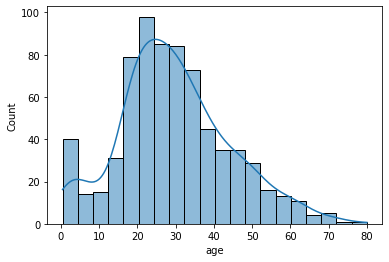

In [7]:
# 1) Mean value Imputation

sns.histplot(df['age'],kde=1)

In [8]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [9]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [10]:
# Mode imputation can be used for categorical values

In [11]:
df[['embarked']].isnull().sum()

embarked    2
dtype: int64

In [12]:
mode_val=df[df['embarked'].notna()]['embarked'].mode()[0]

In [13]:
df['embarked_mode']=df['embarked'].fillna(mode_val)

In [14]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


# Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Dataset is imbalanced when it has majority of the values as one class feature 
and having very less number of minority class features

Imbalanced data can lead to a biased ML model ,therefor it is important 
to train model on balanced datasets

# Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

Up sampling means increasing the number of datapoints of minority class features 
and down sampling means selecting random values from majority class features 

In [15]:
from sklearn.datasets import make_classification

In [16]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,
                   n_clusters_per_class=1,weights=[0.9],random_state=12)

In [17]:
import pandas as pd

In [18]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [19]:
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [20]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [21]:
#Now in this case data is imbalanced and needs to be balanced 

In [22]:
import matplotlib.pyplot as plt


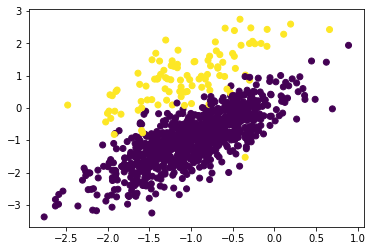

In [23]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
# transform dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [26]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

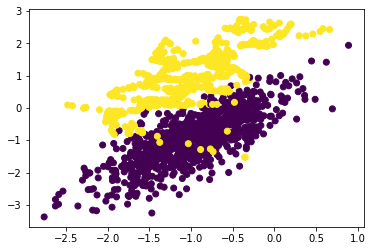

In [27]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

In [28]:
#afeter over  sampling of data

# Q5: What is data Augmentation? Explain SMOTE.

SMOTE is an over-sampling technique focused on generating synthetic tabular data. The general idea of SMOTE is the generation of synthetic data between each sample of the minority class and its “k” nearest neighbors.

# Q6: What are outliers in a dataset? Why is it essential to handle outliers?

An outlier is an observation that lies on a abnormal distance from 
from the rest of the observation in random sample

One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm

# Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

If the missing values are very less than i can drop the rows having missing values 

If a particular column contain missing values than i can drop that column 
given that it is not an important feature 

If data is normally distributed than we can use mean imputation

if data is skewed than we can use median imputation

if data is categorical than we can use mode imputation

# Q8: You are working with a large dataset and find that a small percentage of the data is missing. What aresome strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

If small percanetage of data is missing than we can use imputation technoque to 
fill the data 

If data is normally distributed than we can use mean imputation

if data is skewed than we can use median imputation

if data is categorical than we can use mode imputation

# Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

In case of imbalanced dataset, other alternative evaluation metrics can be applied such as:

Precision/Specificity: how many selected instances are relevant.
    
Recall/Sensitivity: how many relevant instances are selected.
    
F1 score: harmonic mean of precision and recall.
    
MCC: correlation coefficient between the observed and predicted binary classifications.
    
AUC: relation between true-positive rate and false positive rate.

# Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

we can use undersampling ,Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

# Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

we can use over sampling to increase the occurences of minority class 


On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE